# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:


s = pd.Series(fifa['Value'])
fifa['ValueNumeric']=s.str.extract('((\d+\.\d?)|(\d+))')[0].astype(float)

fifa.head()
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
dtype: object

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

fifa_anova=fifa[['Position','Preferred Foot','ValueNumeric',]]
fifa_anova.rename(index=str, columns={"Preferred Foot": "PreFoot"}, inplace=True)
model = ols('ValueNumeric ~ PreFoot +  C(Position)', data=fifa_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,sum_sq,df,F,PR(>F)
PreFoot,7.292211e+04,1.0,0.871795,3.504713e-01
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
'''
In the field "Preferred Foot" the p-value is 0.3504713. This value is higher than 0.05. Therefore, we don't 
reject the null hypothesis because the value can't differ by preferred foot.

In the field "Position" The p-value is 2.192419e-11. This value is very small, certainly smaller than 0.05. 
Therefore, we reject the null hypothesis and conclude that the values differ by position.
'''

'\nIn the field "Preferred Foot" the p-value is 0.3504713. This value is higher than 0.05. Therefore, we don\'t \nreject the null hypothesis because the value can\'t differ by preferred foot.\n\nIn the field "Position" The p-value is 2.192419e-11. This value is very small, certainly smaller than 0.05. \nTherefore, we reject the null hypothesis and conclude that the values differ by position.\n'

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:
model_nat = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
anova_table_nat = sm.stats.anova_lm(model_nat, typ=2)
anova_table_nat


,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [8]:
# Your code here:
fifa.count()
fifa.dropna(inplace=True)
fifa.count()

Name              17918
Age               17918
Nationality       17918
Overall           17918
Potential         17918
Club              17918
Value             17918
Preferred Foot    17918
Position          17918
Weak Foot         17918
Acceleration      17918
SprintSpeed       17918
Stamina           17918
Strength          17918
LongShots         17918
Aggression        17918
Interceptions     17918
Positioning       17918
Vision            17918
Penalties         17918
ValueNumeric      17918
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [9]:
# Your code here:
import statsmodels.api as sm
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Fri, 22 Feb 2019   Prob (F-statistic):             0.0116
Time:                        10:15:44   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [10]:
# Your conclusions here:
'''
The r squared is 0.0 . This means that our model don't capture any variation in the data.

The p-value is smaller than 0.05, this means that the slope is significantly different from zero.
'''

"\nThe r squared is 0.0 . This means that our model don't capture any variation in the data.\n\nThe p-value is smaller than 0.05, this means that the slope is significantly different from zero.\n"

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [11]:
# Your code here:
import statsmodels.api as sm
X = sm.add_constant(fifa.Potential)
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):          9.15e-225
Time:                        10:15:46   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [12]:
# Your conclusions here:
'''
The r squared is 0.056 which is relatively small. This means that our model only captures 5% of the variation in 
the data.

The p-value is very small (9.15e-225), this means that the slope is significantly different from zero.
'''


'\nThe r squared is 0.056 which is relatively small. This means that our model only captures 5% of the variation in \nthe data.\n\nThe p-value is very small (9.15e-225), this means that the slope is significantly different from zero.\n'

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

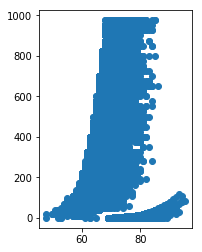

In [15]:
# Your code here:
import statsmodels.api as sm

def linearRegStats(x,y):

    X = sm.add_constant(x) # We must add the intercept using the add_constant function
    Y = y

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 
    print_model = model.summary()
    plt.scatter(x,y)    
    
plt.subplot(1,2,1)
linearRegStats(fifa.Potential, fifa.ValueNumeric)


In [ ]:
'''
I see a exponential relationship.
'''